<H1>Simple Fourier</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [90]:
# create artificial wave signal
sf = 1000 # samples per second
t = np.arange(0,2, 1/sf) # 5 seconds activity

wave = lambda f: np.sin(2*np.pi*f*t) 
signal = 2.5 * wave(4) + 1.5 * wave(6.5) + 0.5*wave(.4)


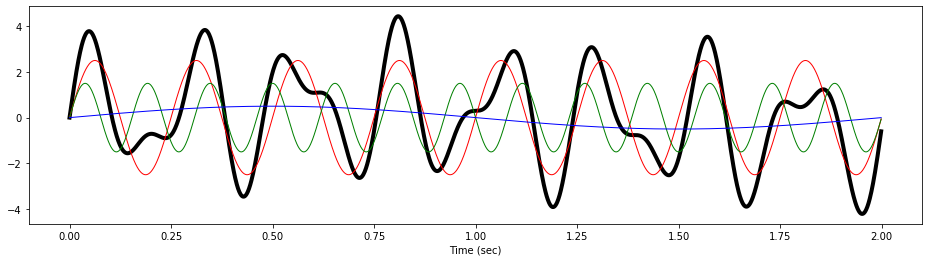

In [99]:
# plot signal and the sum of the waves
plt.figure(figsize=(16,4))
plt.plot(t,signal, lw = 4, color = 'black')
plt.plot(t, 2.5*wave(4), color='red', lw=1)
plt.plot(t, 1.5*wave(6.5), color = 'green', lw = 1)
plt.plot(t, 0.5*wave(0.5), color= 'blue', lw = 1)
plt.xlabel("Time (sec)");

<H2>Discrete Fourier transformation</H2>

In [100]:
# fourTime is the normalized time
fourTime = np.arange(len(signal))/len(signal)
# create a complex wave
csw = lambda freq: np.exp( -1j*2*np.pi*freq*fourTime )

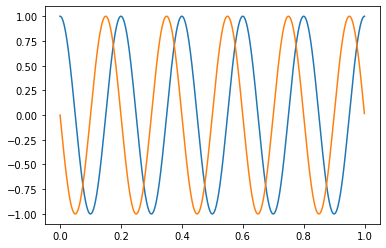

In [101]:
# plot complex wave in the real and imaginary axis
plt.plot(fourTime, csw(5).real)
plt.plot(fourTime, csw(5).imag)

In [102]:
# dot product of complex waves and signal for waves betwen 0 and half the time of the recording
FourierCoeff = list()
for f in range(len(signal)):
    FourierCoeff.append( np.dot(signal, csw(f)) )

In [103]:
# now compute amplitudes
# extract amplitudes
ampl = 2*np.abs(FourierCoeff)

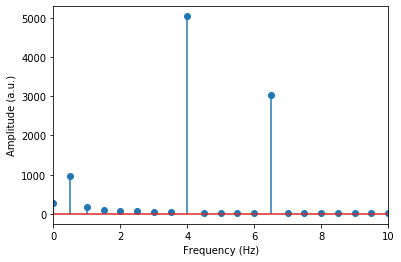

In [104]:
# compute frequencies vector
hz = np.linspace(0,sf/2.,num=math.floor(len(signal)/2.)+1)

plt.stem(hz,ampl[range(0,len(hz))], use_line_collection = True)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

<H2>Plot time course</H2>

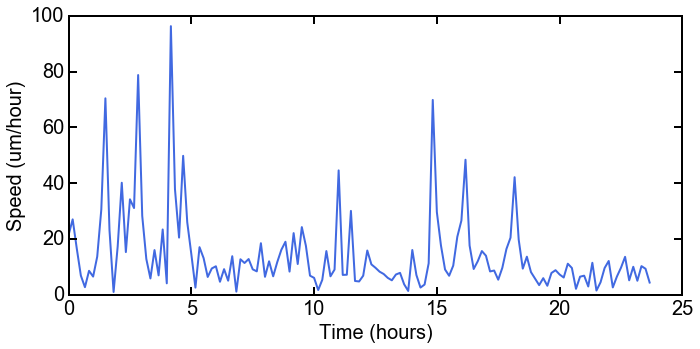

In [2]:
fig = figure(figsize=(11,5))
ax = fig.add_subplot(111)
ax.plot(time, speed, color='royalblue');
ax.set_xlabel('Time (hours)');
ax.set_ylabel('Speed (um/hour)');

<H2>Basic Fourier transform</H2>

In [3]:
n = len(speed) # length of the signal
k = np.arange(n)

dt = 1/6. # 6 in one hours

T = n*dt 
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(speed)/n # fft computing and normalization

Y0 = Y0[range(n/2)]

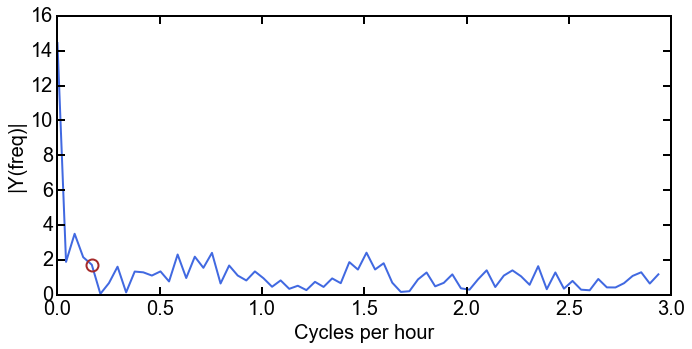

In [4]:
fig = figure(figsize=(11,5))

plt.plot(frq, abs(Y0), color = 'royalblue') # plotting the spectrum


plt.plot(frq[4], abs(Y0)[4], 'o', ms=12, markerfacecolor='None', markeredgecolor='brown', markeredgewidth=2.0 )
plt.xlabel('Cycles per hour')
plt.ylabel('|Y(freq)|')

In [5]:
abs(Y0)[0:10]

array([ 14.43683815,   1.88686005,   3.49970111,   2.15597437,
         1.72543356,   0.0544734 ,   0.6724186 ,   1.61218123,
         0.13933287,   1.33284677])

In [6]:
frq[:10]

array([ 0.        ,  0.04195804,  0.08391608,  0.12587413,  0.16783217,
        0.20979021,  0.25174825,  0.29370629,  0.33566434,  0.37762238])

<H3> Analyze periodicity every 3 hours</H3>

In [8]:
n = len(speed) # length of the signal
k = np.arange(n)

dt = 1/18. # 6 in one hours

T = n*dt 
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(speed)/n # fft computing and normalization

Y0 = Y0[range(n/2)]

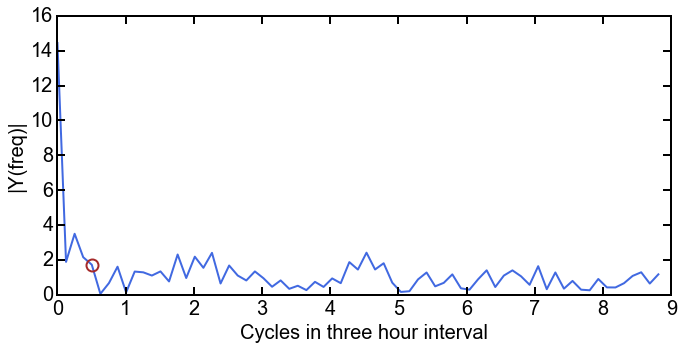

In [9]:
fig = figure(figsize=(11,5))

plt.plot(frq, abs(Y0), color = 'royalblue') # plotting the spectrum


plt.plot(frq[4], abs(Y0)[4], 'o', ms=12, markerfacecolor='None', markeredgecolor='brown', markeredgewidth=2.0 )
plt.xlabel('Cycles in three hour interval')
plt.ylabel('|Y(freq)|')